# Titanic - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Titanic Dataset - Data Dictionary & Analysis

## Data Dictionary

| Variable  | Definition | Key |
|-----------|------------|-----|
| **survival** | Survival | 0 = No, 1 = Yes |
| **pclass** | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| **sex** | Sex | Male/Female |
| **age** | Age in years | Fractional if < 1, estimated values use `.5` notation |
| **sibsp** | # of siblings/spouses aboard |  |
| **parch** | # of parents/children aboard |  |
| **ticket** | Ticket number |  |
| **fare** | Passenger fare |  |
| **cabin** | Cabin number |  |
| **embarked** | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

---

## Variable Notes

- **pclass** (Socio-Economic Status - SES)
  - 1st = Upper Class
  - 2nd = Middle Class
  - 3rd = Lower Class

- **age**
  - Fractional if age < 1
  - Estimated ages use `.5` (e.g., `27.5`)

- **sibsp** (Family Relations)
  - **Sibling** = brother, sister, stepbrother, stepsister
  - **Spouse** = husband, wife (excluding mistresses and fiancés)

- **parch** (Parent/Child Relations)
  - **Parent** = mother, father
  - **Child** = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny (thus, `parch=0` for them)

---


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [7]:
a=(df.isnull().sum())/len(df)*100
a

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
df.groupby('Cabin')['Survived'].sum()

Cabin
A10    0
A14    0
A16    1
A19    0
A20    1
      ..
F33    3
F38    0
F4     2
G6     2
T      0
Name: Survived, Length: 147, dtype: int64

In [9]:
print(df.columns.tolist())
df.head(2)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
# df.drop(['Ticket','PassengerId','Name','Cabin'],axis=1,inplace=True)
df.drop(['Ticket','PassengerId','Cabin'],axis=1,inplace=True)

df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


### Extract Title from name

In [11]:
# Extract title from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split()[0] if isinstance(x, str) and ',' in x else None)

# Dictionary to map uncommon titles to the four main ones
title_mapping = {
    'Mr.': 'Mr.', 'Mrs.': 'Mrs.', 'Miss.': 'Miss.', 'Master.': 'Master.',
    'Mme.': 'Mrs.', 'Ms.': 'Miss.', 'Mlle.': 'Miss.',  # French titles
    'Don.': 'Mr.', 'Rev.': 'Mr.',  'Major.': 'Mr.',   # Male titles
    'Lady.': 'Mrs.', 'Sir.': 'Mr.', 'Jonkheer.': 'Mr.'  # Nobility
}

# Apply mapping, defaulting to None for unmatched titles
df['Title'] = df['Title'].map(title_mapping)

# Fill missing titles based on gender and age
df.loc[(df['Title'].isna()) & (df['Sex'] == 'male') & (df['Age'] >= 18), 'Title'] = 'Mr.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'female') & (df['Age'] >= 18), 'Title'] = 'Mrs.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'female') & (df['Age'] < 18), 'Title'] = 'Miss.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'male') & (df['Age'] < 18), 'Title'] = 'Master.'

# Check unique titles after mapping
df['Title'].unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', nan], dtype=object)

In [12]:
df['Title'].value_counts()

Title
Mr.        536
Miss.      185
Mrs.       129
Master.     40
Name: count, dtype: int64

In [13]:
df.drop(['Name'],axis=1,inplace=True)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Mr.
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,NaN,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


In [15]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [18]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
continuous=['Age','Fare']

discrete_count=['Survived','Pclass','SibSp','Parch']

discrete_categorical=['Sex','Embarked']

In [20]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.1 KB


In [21]:
df[continuous].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Analysis of Continuous Columns

## 1. **Age**
   - **Count**: 714 (out of 891) – Missing values exist.
   - **Mean**: 29.70 – The average age of passengers.
   - **Standard Deviation (std)**: 14.53 – High variability in age.
   - **Min**: 0.42 – The youngest passenger was an infant.
   - **25th Percentile (Q1)**: 20.13 – 25% of passengers were younger than 20.13 years.
   - **Median (Q2)**: 28.00 – Half of the passengers were younger than 28 years.
   - **75th Percentile (Q3)**: 38.00 – 75% of passengers were younger than 38 years.
   - **Max**: 80.00 – The oldest passenger was 80 years old.

   **Insights:**
   - The age distribution is fairly spread, indicating a diverse passenger demographic.
   - There are missing values, which may need imputation (e.g., using median or mean).

## 2. **Fare**
   - **Count**: 891 – No missing values.
   - **Mean**: 32.20 – The average fare paid.
   - **Standard Deviation (std)**: 49.69 – High variability in ticket prices.
   - **Min**: 0.00 – Some passengers did not pay for tickets (possibly crew or free tickets).
   - **25th Percentile (Q1)**: 7.91 – 25% of fares were below $7.91.
   - **Median (Q2)**: 14.45 – Half of the passengers paid less than $14.45.
   - **75th Percentile (Q3)**: 31.00 – 75% of fares were below $31.
   - **Max**: 512.33 – The most expensive ticket cost $512.33.

   **Insights:**
   - The fare distribution is highly skewed, with some passengers paying extremely high fares.
   - The presence of $0 fares suggests special circumstances, such as complimentary tickets.
   - Given the large variation, it might be useful to normalize or categorize fare values.

## Summary:
- **Age** has missing values and high variation, so handling missing data is important.
- **Fare** has extreme outliers, which might impact predictive modeling.


In [22]:
df[discrete_count].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   SibSp     891 non-null    int64
 3   Parch     891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [23]:
df[discrete_count].describe()

,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


# Analysis of Discrete Count Column

## 1. **Survived**
   - **Count**: 891 – No missing values.
   - **Mean**: 0.38 – Only 38.4% of passengers survived.
   - **Standard Deviation (std)**: 0.49 – Close to 0.5, indicating a fairly even distribution.
   - **Min**: 0 – Indicates non-survivors.
   - **Max**: 1 – Indicates survivors.
   - **Percentiles**:
     - 25% (Q1): 0 (Most passengers did not survive).
     - 50% (Median): 0 (More than half did not survive).
     - 75% (Q3): 1 (Some passengers had a higher likelihood of survival).

   **Insights:**
   - Majority of passengers did not survive (62%).
   - Survival analysis should consider other factors like class, age, and family relations.

## 2. **Pclass (Passenger Class)**
   - **Count**: 891 – No missing values.
   - **Mean**: 2.31 – Most passengers belonged to 2nd or 3rd class.
   - **Standard Deviation (std)**: 0.84 – Moderate variation.
   - **Min**: 1 (First Class).
   - **Max**: 3 (Third Class).
   - **Percentiles**:
     - 25% (Q1): 2 (Lower middle class).
     - 50% (Median): 3 (Most passengers were in 3rd class).
     - 75% (Q3): 3 (Majority belonged to the lowest class).

   **Insights:**
   - Skewed towards lower-class passengers.
   - Passenger class likely plays a role in survival chances.

## 3. **SibSp (Siblings/Spouses Aboard)**
   - **Count**: 891 – No missing values.
   - **Mean**: 0.52 – Most passengers traveled alone or with one companion.
   - **Standard Deviation (std)**: 1.10 – Large spread.
   - **Min**: 0 – Many passengers were alone.
   - **Max**: 8 – Some passengers traveled with large families.
   - **Percentiles**:
     - 25% (Q1): 0 (Many were solo travelers).
     - 50% (Median): 0 (Most had no siblings/spouses aboard).
     - 75% (Q3): 1 (Some had at least one travel companion).

   **Insights:**
   - Solo travelers were common.
   - Large family groups were rare but could impact survival rates.

## 4. **Parch (Parents/Children Aboard)**
   - **Count**: 891 – No missing values.
   - **Mean**: 0.38 – Most passengers had no parents or children onboard.
   - **Standard Deviation (std)**: 0.81 – Some variation but skewed towards 0.
   - **Min**: 0 – Many passengers were alone.
   - **Max**: 6 – Few passengers traveled with multiple family members.
   - **Percentiles**:
     - 25% (Q1): 0 (Most were without parents/children).
     - 50% (Median): 0 (Most had no close family aboard).
     - 75% (Q3): 0 (Few traveled with family).

   **Insights:**
   - Family presence could affect survival, as families may have stayed together.
   - Most passengers were independent travelers.

## Summary:
- **Survival Rate**: Low (38% survived).
- **Passenger Class**: Most were in 3rd class.
- **Family Size**: Majority were solo travelers.
- **Potential Influences on Survival**:
  - Higher-class passengers might have had a survival advantage.
  - Traveling with family might have impacted survival chances.


In [24]:
df[discrete_categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


In [25]:
df[discrete_categorical].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


# Analysis of Discrete Categorical Column

## 1. **Sex**
   - **Count**: 891 – No missing values.
   - **Unique Values**: 2 (Male, Female).
   - **Most Frequent Value (Top)**: Male (577 occurrences).
   - **Frequency of Top Value**: 577.

   **Insights:**
   - More male passengers than female passengers.
   - Gender could play a role in survival rates (e.g., "women and children first" policy).

## 2. **Embarked (Port of Embarkation)**
   - **Count**: 889 – 2 missing values.
   - **Unique Values**: 3 (S, C, Q).
   - **Most Frequent Value (Top)**: Southampton (S).
   - **Frequency of Top Value**: 644.

   **Insights:**
   - Majority of passengers boarded from Southampton.
   - Missing values (2) should be handled properly (imputation with mode "S" could be an option).
   - Embarkation location might correlate with class, fare, or survival rates.

## Summary:
- **Sex** is a key factor for survival analysis.
- **Embarked** has missing values that need handling.
- **Majority of passengers were male and boarded from Southampton**.


In [26]:
for i in continuous:
    print(f"No. of Unique values in {i} column are {df[i].nunique()}")
    print("\n")

No. of Unique values in Age column are 88


No. of Unique values in Fare column are 248




In [27]:
for i in discrete_count:
    print(f"Unique values in {i} column are {df[i].unique()}")
    print(f"Unique value counts  in {df[i].value_counts()}")
    print("\n")

Unique values in Survived column are [0 1]
Unique value counts  in Survived
0    549
1    342
Name: count, dtype: int64


Unique values in Pclass column are [3 1 2]
Unique value counts  in Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Unique values in SibSp column are [1 0 3 4 2 5 8]
Unique value counts  in SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Unique values in Parch column are [0 1 2 5 3 4 6]
Unique value counts  in Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64




# Analysis of Discrete Count Columns

## 1. **Survived**
   - **Unique Values**: 2 (0 = No, 1 = Yes).
   - **Count of 0 (Did not survive)**: 549.
   - **Count of 1 (Survived)**: 342.

   **Insights:**
   - Survival rate is **38.3% (342/891)**.
   - Majority (61.7%) of passengers did not survive.

## 2. **Pclass (Passenger Class)**
   - **Unique Values**: 3 (1st, 2nd, 3rd class).
   - **1st Class**: 216 passengers.
   - **2nd Class**: 184 passengers.
   - **3rd Class**: 491 passengers.

   **Insights:**
   - Most passengers were in **3rd class (55.1%)**, followed by **1st class (24.2%)**, and **2nd class (20.7%)**.
   - Socioeconomic status could impact survival rates.

## 3. **SibSp (Number of Siblings/Spouses Aboard)**
   - **Unique Values**: 7 (0, 1, 2, 3, 4, 5, 8).
   - **Most Common Value**: 0 (608 passengers traveled alone).
   - **Other notable values**:
     - 1 sibling/spouse: 209 passengers.
     - 2 siblings/spouses: 28 passengers.
     - Larger family groups were rare.

   **Insights:**
   - Most passengers were traveling alone.
   - Larger families might have faced challenges during the disaster.

## 4. **Parch (Number of Parents/Children Aboard)**
   - **Unique Values**: 7 (0, 1, 2, 3, 4, 5, 6).
   - **Most Common Value**: 0 (678 passengers traveled without parents or children).
   - **Other notable values**:
     - 1 parent/child: 118 passengers.
     - 2 parents/children: 80 passengers.
     - More than 2 was rare.

   **Insights:**
   - Majority of passengers were not traveling with family.
   - Family presence may have influenced survival chances.

## **Overall Summary**
- **Survival rate is low (38.3%)**.
- **Most passengers were in 3rd class**.
- **Majority traveled alone (no SibSp or Parch)**.
- **Family presence and class could be strong predictors of survival**.


In [28]:
for i in discrete_categorical:
    print(f"Unique values in {i} column are {df[i].unique()}")
    print(f"Unique value counts  in {df[i].value_counts()}")
    print("\n")

Unique values in Sex column are ['male' 'female']
Unique value counts  in Sex
male      577
female    314
Name: count, dtype: int64


Unique values in Embarked column are ['S' 'C' 'Q' nan]
Unique value counts  in Embarked
S    644
C    168
Q     77
Name: count, dtype: int64




# Analysis of Discrete Categorical Columns

## 1. **Sex**
   - **Unique Values**: 2 (`male`, `female`).
   - **Male Count**: 577 passengers.
   - **Female Count**: 314 passengers.

   **Insights:**
   - **Males make up the majority (64.8%)** of the passengers.
   - Gender could be a key factor in survival rates.

## 2. **Embarked (Port of Embarkation)**
   - **Unique Values**: 3 (`S = Southampton`, `C = Cherbourg`, `Q = Queenstown`).
   - **Missing Values**: 2.
   - **Distribution**:
     - **Southampton (S)**: 644 passengers (**72.3%**).
     - **Cherbourg (C)**: 168 passengers (**18.9%**).
     - **Queenstown (Q)**: 77 passengers (**8.6%**).

   **Insights:**
   - Majority of passengers **embarked from Southampton (S)**.
   - **Cherbourg had the highest proportion of 1st-class passengers**, which may impact survival rates.
   - **Missing values in 'Embarked' should be handled** (e.g., imputation with the most common value, `S`).

## **Overall Summary**
- **Most passengers were male (64.8%)**.
- **Most passengers embarked from Southampton (72.3%)**.
- **Port of embarkation might be linked to socio-economic class and survival rates**.


In [29]:
a=(df.isnull().sum())/len(df)*100
a

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
Title        0.112233
dtype: float64

In [30]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         1
dtype: int64

In [31]:
df.dropna(subset=['Title'], inplace=True)

In [32]:
df['Age'].skew()

0.38910778230082704

In [33]:
df['Fare'].skew()

4.785315989361568

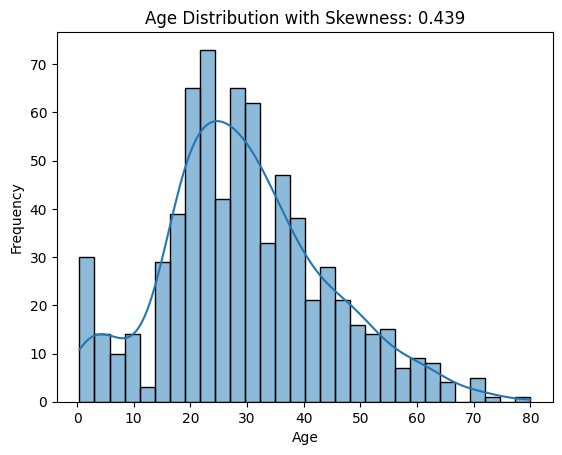

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution with Skewness: 0.439")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [35]:
# Compute median age for each Title group
title_age_median = df.groupby('Title')['Age'].median()

# Fill missing ages with the median age of the corresponding Title group
df['Age'] = df.apply(lambda row: title_age_median[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)


In [36]:
# df['Age'].fillna(df['Age'].median(), inplace=True)

In [37]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [38]:
a=(df.isnull().sum())/len(df)*100
a

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
Title       0.0
dtype: float64

In [39]:
df.duplicated().sum()

114

In [40]:
(df.duplicated().sum())/len(df)*100

12.808988764044942

In [41]:
df[df.duplicated()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
47,1,3,female,21.0,0,0,7.7500,Q,Miss.
76,0,3,male,30.0,0,0,7.8958,S,Mr.
77,0,3,male,30.0,0,0,8.0500,S,Mr.
87,0,3,male,30.0,0,0,8.0500,S,Mr.
95,0,3,male,30.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Mr.
877,0,3,male,19.0,0,0,7.8958,S,Mr.
878,0,3,male,30.0,0,0,7.8958,S,Mr.
884,0,3,male,25.0,0,0,7.0500,S,Mr.


In [42]:
df[df.duplicated(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'])]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
47,1,3,female,21.0,0,0,7.7500,Q,Miss.
76,0,3,male,30.0,0,0,7.8958,S,Mr.
77,0,3,male,30.0,0,0,8.0500,S,Mr.
87,0,3,male,30.0,0,0,8.0500,S,Mr.
95,0,3,male,30.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Mr.
877,0,3,male,19.0,0,0,7.8958,S,Mr.
878,0,3,male,30.0,0,0,7.8958,S,Mr.
884,0,3,male,25.0,0,0,7.0500,S,Mr.


In [43]:
df.groupby(['Title', 'Age', 'Fare']).size().sort_values(ascending=False)


Title  Age   Fare   
Mr.    30.0  7.8958     16
             8.0500     14
             7.7500     11
Miss.  21.0  7.7500     10
Mr.    30.0  0.0000      8
                        ..
       20.0  9.5000      1
             9.8458      1
             15.7417     1
       20.5  7.2500      1
Mrs.   63.0  9.5875      1
Length: 746, dtype: int64

In [44]:
df[df.duplicated()]['Title'].value_counts()


Title
Mr.        93
Miss.      17
Mrs.        3
Master.     1
Name: count, dtype: int64

In [45]:
df[df.duplicated()]['Age'].value_counts()


Age
30.00    64
21.00    16
28.00     3
22.00     3
25.00     3
35.00     3
34.00     3
23.00     2
19.00     2
32.00     2
17.00     2
62.00     1
50.00     1
20.00     1
0.75      1
44.00     1
3.50      1
29.00     1
18.00     1
39.00     1
26.00     1
27.00     1
Name: count, dtype: int64

In [46]:
df[df.duplicated(keep=False)]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
4,0,3,male,35.0,0,0,8.0500,S,Mr.
26,0,3,male,30.0,0,0,7.2250,C,Mr.
28,1,3,female,21.0,0,0,7.8792,Q,Miss.
29,0,3,male,30.0,0,0,7.8958,S,Mr.
32,1,3,female,21.0,0,0,7.7500,Q,Miss.
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Mr.
877,0,3,male,19.0,0,0,7.8958,S,Mr.
878,0,3,male,30.0,0,0,7.8958,S,Mr.
884,0,3,male,25.0,0,0,7.0500,S,Mr.


In [47]:
df[df.duplicated()].mode().iloc[0]  # Get the first row of mode()


Survived         0
Pclass           3
Sex           male
Age           30.0
SibSp            0
Parch            0
Fare        7.8958
Embarked         S
Title          Mr.
Name: 0, dtype: object

In [48]:
df[df.duplicated()].mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,30.0,0,0,7.8958,S,Mr.


In [49]:
df.value_counts().head(1)  # Shows the most frequently occurring duplicate row


Survived  Pclass  Sex   Age   SibSp  Parch  Fare  Embarked  Title
0         3       male  30.0  0      0      8.05  S         Mr.      14
Name: count, dtype: int64

In [50]:
df[df.duplicated(keep=False)].value_counts().head()


Survived  Pclass  Sex     Age   SibSp  Parch  Fare    Embarked  Title
0         3       male    30.0  0      0      8.0500  S         Mr.      14
                                              7.8958  S         Mr.      14
                                              7.7500  Q         Mr.       9
1         3       female  21.0  0      0      7.7500  Q         Miss.     7
0         2       male    30.0  0      0      0.0000  S         Mr.       6
Name: count, dtype: int64

In [51]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

df.shape

(776, 9)

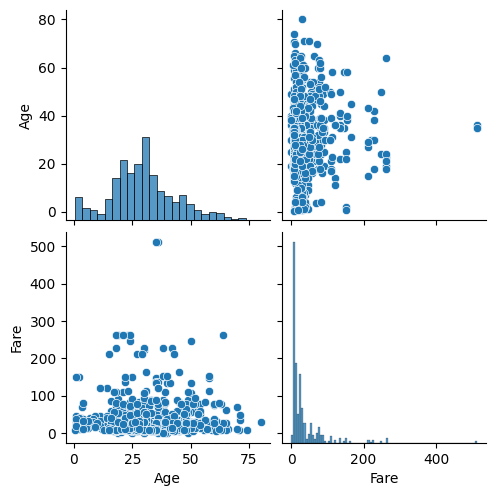

In [52]:
sns.pairplot(df[continuous])
plt.show()

In [53]:
df[continuous].corrwith(df['Survived'])

Age    -0.078060
Fare    0.242408
dtype: float64

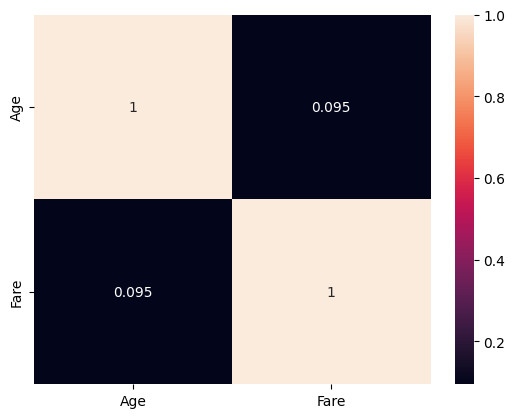

In [54]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

In [55]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.


In [56]:
df['Family_Companion']=df['SibSp']+df['Parch']+1
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Companion
0,0,3,male,22.0,7.2500,S,Mr.,2
1,1,1,female,38.0,71.2833,C,Mrs.,2


#### Outliers Hunting

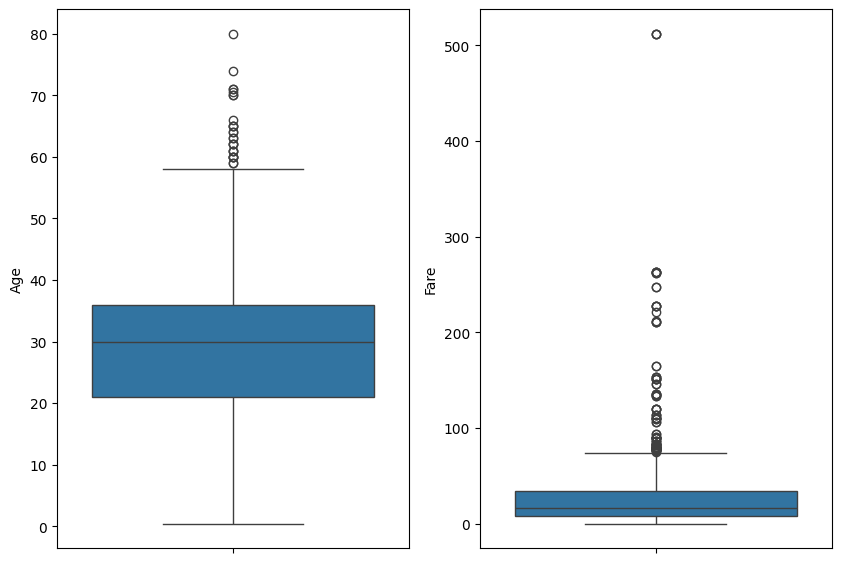

In [57]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
sns.boxplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

plt.show()

In [58]:
for i in df[continuous]:
    q3=df[i].quantile(0.75)
    q1=df[i].quantile(0.25)
    IQR=q3-q1
    
    upper_limit=q3+(1.5*IQR)
    lower_limit=q1-(1.5*IQR)
    
    outlier_indices=df[(df[i]<lower_limit) | (df[i]>upper_limit)].index.tolist()
    
    total_no=(df[i]<lower_limit) | (df[i]>upper_limit)
    
    print(f"Outlier present in {i} are {outlier_indices}")
    print('\n')
    print(f"Total Outlier present in {i} are {(total_no).sum()}")
    print('\n')

Outlier present in Age are [33, 53, 90, 91, 110, 161, 218, 237, 258, 263, 303, 335, 397, 414, 435, 442, 486, 507, 523, 553, 558, 590, 601, 610, 654, 726, 743]


Total Outlier present in Age are 27


Outlier present in Fare are [27, 31, 34, 51, 60, 61, 84, 96, 112, 117, 131, 185, 202, 205, 210, 216, 230, 241, 242, 243, 246, 252, 253, 258, 273, 274, 279, 281, 285, 286, 287, 290, 291, 297, 298, 302, 309, 311, 313, 317, 335, 341, 343, 345, 348, 357, 360, 377, 394, 397, 404, 412, 436, 437, 444, 446, 450, 451, 465, 469, 478, 485, 491, 497, 498, 517, 521, 523, 525, 540, 555, 568, 579, 580, 596, 598, 606, 613, 615, 623, 630, 644, 648, 650, 651, 666, 669, 671, 682, 692, 701, 717, 726, 731, 741, 748, 766]


Total Outlier present in Fare are 97




In [59]:
df.loc[[33, 53, 90, 91, 110, 161, 218, 237, 258, 263, 303, 335, 397, 414, 435, 
        442, 486, 507, 523, 553, 558, 590, 601, 610, 654, 726, 743], 'Age']


33     66.0
53     65.0
90     59.0
91     71.0
110    70.5
161    61.0
218    59.0
237    62.0
258    63.0
263    65.0
303    61.0
335    60.0
397    64.0
414    65.0
435    63.0
442    71.0
486    64.0
507    62.0
523    60.0
553    61.0
558    80.0
590    70.0
601    60.0
610    60.0
654    70.0
726    62.0
743    74.0
Name: Age, dtype: float64

### Clipping of Age Column

In [60]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  # Maximum reasonable age
lower_bound = Q1 - 1.5 * IQR  # Minimum reasonable age

df['Age'] = df['Age'].clip(lower_bound, upper_bound)


In [61]:
df.loc[[27, 31, 34, 51, 60, 61, 84, 96, 112, 117, 131, 185, 202, 205, 210, 216, 
        230, 241, 242, 243, 246, 252, 253, 258, 273, 274, 279, 281, 285, 286, 
        287, 290, 291, 297, 298, 302, 309, 311, 313, 317, 335, 341, 343, 345, 
        348, 357, 360, 377, 394, 397, 404, 412, 436, 437, 444, 446, 450, 451, 
        465, 469, 478, 485, 491, 497, 498, 517, 521, 523, 525, 540, 555, 568, 
        579, 580, 596, 598, 606, 613, 615, 623, 630, 644, 648, 650, 651, 666, 
        669, 671, 682, 692, 701, 717, 726, 731, 741, 748, 766], 'Fare']


27     263.0000
31     146.5208
34      82.1708
51      76.7292
60      80.0000
         ...   
726     80.0000
731     83.1583
741     89.1042
748    164.8667
766     83.1583
Name: Fare, Length: 97, dtype: float64

In [62]:
df[df['Fare']==0]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Companion
169,0,3,male,36.0,0.0,S,Mr.,1
247,0,1,male,40.0,0.0,S,Mr.,1
255,1,3,male,25.0,0.0,S,Mr.,1
260,0,2,male,30.0,0.0,S,Mr.,1
283,0,3,male,19.0,0.0,S,Mr.,1
531,0,3,male,49.0,0.0,S,Mr.,1
561,0,1,male,30.0,0.0,S,Mr.,1
705,0,1,male,39.0,0.0,S,Mr.,1
719,0,1,male,38.0,0.0,S,Mr.,1


In [63]:
(df['Fare']==0).sum()

9

In [64]:
df[df['Fare'] == 0].groupby(['Pclass', 'Embarked'])['Fare'].count()


Pclass  Embarked
1       S           4
2       S           1
3       S           4
Name: Fare, dtype: int64

In [65]:
df.loc[df['Fare']==0,'Fare']=df.groupby('Pclass')['Fare'].transform('median')

In [66]:
df.groupby('Pclass')['Fare'].count()

Pclass
1    211
2    165
3    400
Name: Fare, dtype: int64

In [67]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_Companion
0,0,3,male,22.0,7.2500,S,Mr.,2
1,1,1,female,38.0,71.2833,C,Mrs.,2


In [68]:
df.groupby('Pclass')['Fare'].max().value_counts()

Fare
512.3292    1
73.5000     1
69.5500     1
Name: count, dtype: int64

In [69]:
bins=[0,69.5500,73.5000,512.3292]
labels=['Low','Medium','High']
df['Fare_category']=pd.cut(df['Fare'],bins=bins,labels=labels)
df.drop(['Fare'],axis=1,inplace=True)
df.head(2)

,Survived,Pclass,Sex,Age,Embarked,Title,Family_Companion,Fare_category
0,0,3,male,22.0,S,Mr.,2,Low
1,1,1,female,38.0,C,Mrs.,2,Medium


### Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
# df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family_Companion,Fare_category
0,0,3,1,22.0,S,Mr.,2,Low
1,1,1,0,38.0,C,Mrs.,2,Medium
2,1,3,0,26.0,S,Miss.,1,Low
3,1,1,0,35.0,S,Mrs.,2,Low
4,0,3,1,35.0,S,Mr.,1,Low


In [71]:
df.query('Age > 20 and Sex==0')

,Survived,Pclass,Sex,Age,Embarked,Title,Family_Companion,Fare_category
1,1,1,0,38.0,C,Mrs.,2,Medium
2,1,3,0,26.0,S,Miss.,1,Low
3,1,1,0,35.0,S,Mrs.,2,Low
8,1,3,0,27.0,S,Mrs.,3,Low
11,1,1,0,58.0,S,Miss.,1,Low
...,...,...,...,...,...,...,...,...
766,1,1,0,56.0,C,Mrs.,2,High
767,1,2,0,25.0,S,Mrs.,2,Low
769,0,3,0,22.0,S,Miss.,1,Low
771,0,3,0,39.0,Q,Mrs.,6,Low


In [72]:
# from sklearn.preprocessing import OrdinalEncoder
# categories=['Low','Medium','High']
# oe=OrdinalEncoder(categories=[categories])
# df['Fare_category']=oe.fit_transform(df[['Fare_category']])
# df.head()

In [73]:
# One-Hot Encoding for 'Embarked', 'Title', 'Fare_category'
df = pd.get_dummies(df, columns=['Embarked', 'Title', 'Fare_category'], drop_first=True)


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df.drop(['Age'],axis=1,inplace=True)

### Seperate Input & Output Columns

In [75]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

### Find Best Random State Number

In [76]:
train=[]
cv=[]
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    model=LogisticRegression()
    model.fit(X_train,y_train)

    ypred_train=model.predict(X_train)
    
    train.append(accuracy_score(y_train,ypred_train))
    cv.append((cross_val_score(model,X_train,y_train,cv=5)).mean())

a=pd.DataFrame({"Train":train,"CV":cv})
b=a[abs(a['Train']-a['CV'])<0.05]
rs=b[(b['CV']==b['CV'].max())].index.tolist()[0]
print(f"Best Random State no. is {rs}")

Best Random State no. is 49


### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [78]:
# Select only boolean columns and convert them to int
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)
X_train.shape

(620, 11)

In [79]:
X_train.head(2)

,Pclass,Sex,Family_Companion,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Fare_category_Medium,Fare_category_High,Age_scaled
743,3,1,1,0,1,0,1,0,0,0,2.177152
558,1,1,1,0,1,0,1,0,0,0,2.177152


## ML modelling & evaluation

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()

model_1.fit(X_train,y_train)

ypred_train_1=model_1.predict(X_train)
ypred_test_1=model_1.predict(X_test)

train_accuracy_1=accuracy_score(y_train,ypred_train_1)
test_accuracy_1=accuracy_score(y_test,ypred_test_1)
CV_score_1=(cross_val_score(model_1,X_train,y_train,cv=5)).mean()

print(f"Train accuracy score is {train_accuracy_1}")
print(f"Test accuracy score is {test_accuracy_1}")
print(f"CV score is {CV_score_1}")

Train accuracy score is 0.8354838709677419
Test accuracy score is 0.7435897435897436
CV score is 0.8241935483870968


### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,51))}

from sklearn.model_selection import GridSearchCV                    # Hyperparameter Tuning
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

model_2=model.best_estimator_        #model.best_estimator_ holds the model that had the best performance

ypred_train_2=model_2.predict(X_train)
ypred_test_2=model_2.predict(X_test)

train_accuracy_2=accuracy_score(y_train,ypred_train_2)
test_accuracy_2=accuracy_score(y_test,ypred_test_2)
CV_score_2=(cross_val_score(model_2,X_train,y_train,cv=5)).mean()

print(model.best_params_)
print(f"Train accuracy score is {train_accuracy_2}")
print(f"Test accuracy score is {test_accuracy_2}")
print(f"CV score is {CV_score_2}")

{'n_neighbors': 19}
Train accuracy score is 0.8306451612903226
Test accuracy score is 0.7371794871794872
CV score is 0.8241935483870968


### SVM

In [82]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
# param_grid={'C':[0.1],'kernel':['linear']}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5, n_jobs=-1, verbose=1) 
model.fit(X_train,y_train)

model_3=model.best_estimator_

ypred_train_3=model_3.predict(X_train)
ypred_test_3=model_3.predict(X_test)

train_accuracy_3=accuracy_score(y_train,ypred_train_3)
test_accuracy_3=accuracy_score(y_test,ypred_test_3)
CV_score_3=(cross_val_score(model_3,X_train,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {train_accuracy_3}')
print(f'Test accuracy is {test_accuracy_3}')
print(f"CV score is {CV_score_3}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 0.1, 'kernel': 'rbf'}
Train accuracy is 0.8258064516129032
Test accuracy is 0.7435897435897436
CV score is 0.8258064516129032


### Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()
param_grid={"criterion":['gini','entropy'],'max_depth':list(range(1,8))}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5, n_jobs=-1, verbose=1) 
model.fit(X_train,y_train)

model_4=model.best_estimator_

# identify the importance of each feature
df_features=model_4.feature_importances_

# feature with feature importance greater than zero
best_features=[i for i in df_features if i>0]

# Creating new dataset with important featurres
X_train_dt=X_train.iloc[:,best_features]
X_test_dt=X_test.iloc[:,best_features]

model_4.fit(X_train_dt,y_train)

ypred_train_4=model_4.predict(X_train_dt)
ypred_test_4=model_4.predict(X_test_dt)

train_accuracy_4=accuracy_score(y_train,ypred_train_4)
test_accuracy_4=accuracy_score(y_test,ypred_test_4)
CV_score_4=(cross_val_score(model_4,X_train_dt,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {train_accuracy_4}')
print(f'Test accuracy is {test_accuracy_4}')
print(f"CV score is {CV_score_4}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
{'criterion': 'entropy', 'max_depth': 3}
Train accuracy is 0.6596774193548387
Test accuracy is 0.6538461538461539
CV score is 0.6516129032258065


### Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=rs)
param_grid={'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

model_5=model.best_estimator_

# identify the importance of each feature
rf_features=model_5.feature_importances_

# feature with feature importance greater than zero
rf_best_features=[i for i,x in enumerate(rf_features) if x>0]

# Creating new dataset with important featurres
X_train_rf=X_train.iloc[:,rf_best_features]
X_test_rf=X_test.iloc[:,rf_best_features]

# Training the model with best feature
model_5.fit(X_train_rf,y_train)


ypred_train_5=model_5.predict(X_train_rf)
ypred_test_5=model_5.predict(X_test_rf)

train_accuracy_5=accuracy_score(y_train,ypred_train_5)
test_accuracy_5=accuracy_score(y_test,ypred_test_5)
CV_score_5=(cross_val_score(model_5,X_train,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {train_accuracy_5}')
print(f'Test accuracy is {test_accuracy_5}')
print(f"CV score is {CV_score_5}")

{'n_estimators': 29}
Train accuracy is 0.9354838709677419
Test accuracy is 0.7371794871794872
CV score is 0.7903225806451614


### Ada Boost Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=rs)
param_grid={'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

model_6=model.best_estimator_        #model.best_estimator_ holds the model that had the best performance

# identify the importance of each feature
ab_features=model_6.feature_importances_

# feature with feature importance greater than zero
ab_best_features=[i for i,x in enumerate(ab_features) if x>0]

# Creating new dataset with important featurres
X_train_ab=X_train.iloc[:,ab_best_features]
X_test_ab=X_test.iloc[:,ab_best_features]

# Training the model with best feature
model_6.fit(X_train_ab,y_train)

ypred_train_6=model_6.predict(X_train_ab)
ypred_test_6=model_6.predict(X_test_ab)

train_accuracy_6=accuracy_score(y_train,ypred_train_6)
test_accuracy_6=accuracy_score(y_test,ypred_test_6)
CV_score_6=(cross_val_score(model_6,X_train,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {accuracy_score(y_train,ypred_train_6)}')
print(f'Test accuracy is {accuracy_score(y_test,ypred_test_6)}')
print(f"CV score is {(cross_val_score(model_6,X_train_ab,y_train,cv=5,scoring='accuracy')).mean()}")

{'n_estimators': 5}
Train accuracy is 0.8306451612903226
Test accuracy is 0.75
CV score is 0.8306451612903226


### Gradient Boost Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=rs)
param_grid={'n_estimators':list(range(1,10)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.8,1]}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

model_7=model.best_estimator_        #model.best_estimator_ holds the model that had the best performance

# identify the importance of each feature
gb_features=model_7.feature_importances_

# feature with feature importance greater than zero
gb_best_features=[i for i,x in enumerate(gb_features) if x>0]

# Creating new dataset with important featurres
X_train_gb=X_train.iloc[:,gb_best_features]
X_test_gb=X_test.iloc[:,gb_best_features]

# Training the model with best feature
model_7.fit(X_train_gb,y_train)

ypred_train_7=model_7.predict(X_train_gb)
ypred_test_7=model_7.predict(X_test_gb)

train_accuracy_7=accuracy_score(y_train,ypred_train_7)
test_accuracy_7=accuracy_score(y_test,ypred_test_7)
CV_score_7=(cross_val_score(model_7,X_train,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {accuracy_score(y_train,ypred_train_7)}')
print(f'Test accuracy is {accuracy_score(y_test,ypred_test_7)}')
print(f"CV score is {(cross_val_score(model_7,X_train,y_train,cv=5,scoring='accuracy')).mean()}")

{'learning_rate': 1, 'n_estimators': 1}
Train accuracy is 0.8306451612903226
Test accuracy is 0.75
CV score is 0.8306451612903226


### XGB Classifier

In [87]:
from xgboost import XGBClassifier
estimator=XGBClassifier(random_state=rs)
param_grid={'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
model.fit(X_train,y_train)

model_8=model.best_estimator_        #model.best_estimator_ holds the model that had the best performance

# identify the importance of each feature
xgb_features=model_8.feature_importances_

# feature with feature importance greater than zero
xgb_best_features=[i for i,x in enumerate(xgb_features) if x>0]

# Creating new dataset with important featurres
X_train_xgb=X_train.iloc[:,xgb_best_features]
X_test_xgb=X_test.iloc[:,xgb_best_features]

# Training the model with best feature
model_8.fit(X_train_xgb,y_train)

ypred_train_8=model_8.predict(X_train_xgb)
ypred_test_8=model_8.predict(X_test_xgb)

train_accuracy_8=accuracy_score(y_train,ypred_train_8)
test_accuracy_8=accuracy_score(y_test,ypred_test_8)
CV_score_8=(cross_val_score(model_8,X_train,y_train,cv=5,scoring='accuracy')).mean()

print(model.best_params_)
print(f'Train accuracy is {accuracy_score(y_train,ypred_train_8)}')
print(f'Test accuracy is {accuracy_score(y_test,ypred_test_8)}')
print(f"CV score is {(cross_val_score(model_8,X_train,y_train,cv=5,scoring='accuracy')).mean()}")

{'gamma': 0.15, 'max_depth': 4, 'n_estimators': 10}
Train accuracy is 0.8612903225806452
Test accuracy is 0.75
CV score is 0.832258064516129


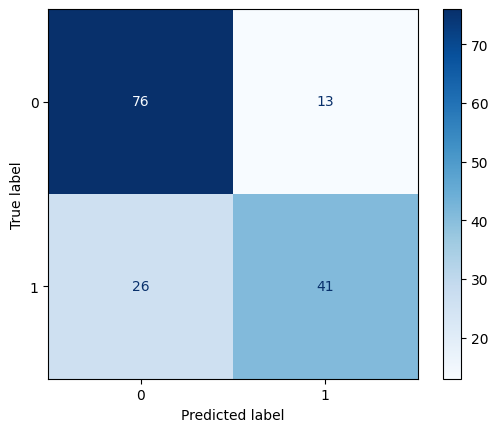

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, ypred_test_8)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Use a color map for better visualization

# Show the plot
plt.show()


In [89]:
best_model=pd.DataFrame({"Logistic Regression":[train_accuracy_1,test_accuracy_1,CV_score_1],
                         "KNN":[train_accuracy_2,test_accuracy_2,CV_score_2],
                          "SVM":[train_accuracy_3,test_accuracy_3,CV_score_3],
                           "Decision Tree":[train_accuracy_4,test_accuracy_4,CV_score_4],
                            "Random Forest":[train_accuracy_5,test_accuracy_5,CV_score_5],
                             "AdaBoostClassifier":[train_accuracy_6,test_accuracy_6,CV_score_6],
                        "GradientBoostingClassifier":[train_accuracy_7,test_accuracy_7,CV_score_7],
                        "XGBClassifier":[train_accuracy_8,test_accuracy_8,CV_score_8]},
                       index=['Training_accuracy','Testing_accuracy','CV_score'])
best_model

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Training_accuracy,0.835484,0.830645,0.825806,0.659677,0.935484,0.830645,0.830645,0.861290
Testing_accuracy,0.743590,0.737179,0.743590,0.653846,0.737179,0.750000,0.750000,0.750000
CV_score,0.824194,0.824194,0.825806,0.651613,0.790323,0.830645,0.830645,0.832258


In [90]:
# best_model = best_model.T  
# filtered_model = best_model.loc[:, abs(best_model.loc["Training_accuracy"] - best_model.loc["Testing_accuracy"]) < 0.05]
# filtered_model

Survived
0    58.247423
1    41.752577
Name: proportion, dtype: float64


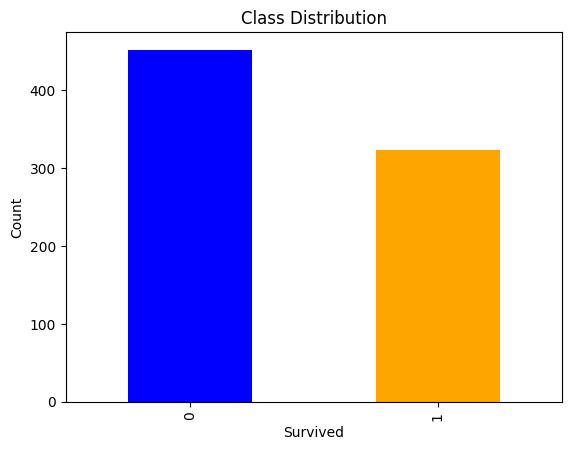

In [91]:
import matplotlib.pyplot as plt  

# Count unique values in the target column
print(df['Survived'].value_counts(normalize=True) * 100)  # Percentage

# Plot the class distribution
df['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


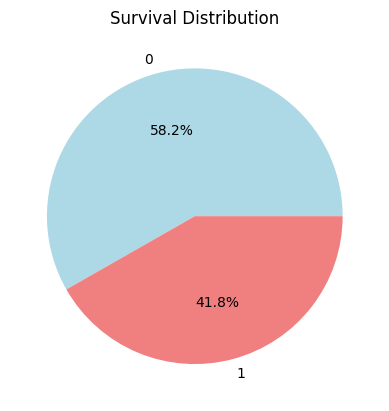

In [92]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Survival Distribution")
plt.ylabel("")
plt.show()


In [93]:
X_train.shape

(620, 11)

In [94]:
X_train

,Pclass,Sex,Family_Companion,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Fare_category_Medium,Fare_category_High,Age_scaled
743,3,1,1,0,1,0,1,0,0,0,2.177152
558,1,1,1,0,1,0,1,0,0,0,2.177152
550,3,1,3,0,0,0,1,0,0,0,-0.699135
243,1,0,1,0,0,1,0,0,0,1,0.421496
163,3,0,3,0,1,1,0,0,0,0,-2.118602
...,...,...,...,...,...,...,...,...,...,...,...
182,3,0,2,0,1,1,0,0,0,0,-0.773844
501,2,1,1,0,1,0,1,0,0,0,-0.101465
424,3,0,4,0,0,1,0,0,0,0,-2.137279
685,1,1,1,0,1,0,1,0,0,0,-0.026757


### Applying Deep Learning

In [95]:
import tensorflow as tf
import keras

In [96]:
from keras.models import Sequential
model_9=Sequential()

In [97]:
from keras.layers import Dense
model_9.add(Dense(input_dim=11,units=20,kernel_initializer='uniform',activation='relu'))
model_9.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))
model_9.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))

model_9.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model_9.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_9.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5301 - loss: 0.6928
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 0.6908 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5679 - loss: 0.6851 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 0.6624 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.6027 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7829 - loss: 0.5498 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.5109 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4908 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.4984 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8070 - loss: 0.4649 
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8126 - loss: 0.4640 
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [98]:
ypred_train_9=model_9.predict(X_train)
ypred_train_9=(ypred_train_9)>0.5
ypred_test_9=model_9.predict(X_test)
ypred_test_9=(ypred_test_9)>0.5

train_accuracy_9=accuracy_score(y_train,ypred_train_9)
test_accuracy_9=accuracy_score(y_test,ypred_test_9)

print(f"Train accuracy is {train_accuracy_9}")
print(f"Test accuracy is {test_accuracy_9}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Train accuracy is 0.8387096774193549
Test accuracy is 0.75


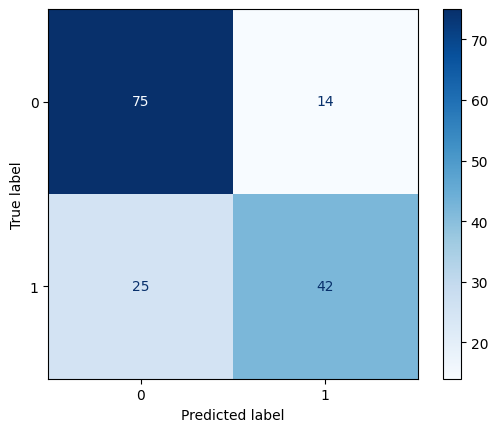

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, ypred_test_9)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Use a color map for better visualization

# Show the plot
plt.show()


### Cross Validation on ANN Model

In [100]:
def crossval_model():
    classifier=Sequential()
    classifier.add(Dense(input_dim=11,units=20,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [101]:
from scikeras.wrappers import KerasClassifier
classifier=KerasClassifier(crossval_model,batch_size=32,epochs=50)

In [102]:
from sklearn.model_selection import cross_val_score
cv_score=(cross_val_score(classifier,X_train,y_train,cv=5))
cv_score=cv_score.mean()
cv_score

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5918 - loss: 0.6923
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6243 - loss: 0.6873 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5822 - loss: 0.6802 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5795 - loss: 0.6651 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5944 - loss: 0.6396 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5945 - loss: 0.6115 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.5913 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5785 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.5488 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7542 - loss: 0.5276 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.5039 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

0.814516129032258

In [103]:
cv_score

0.814516129032258

In [104]:
estimator=KerasClassifier(crossval_model())
param_grid={"batch_size":[32],"epochs":[50,65,80],"optimizer":['adam','rmsprop']}

In [105]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_result=grid.fit(X_train,y_train)

Epoch 1/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5261 - loss: 0.6924 
Epoch 2/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 0.6880 
Epoch 3/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5816 - loss: 0.6771 
Epoch 4/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5840 - loss: 0.6528
Epoch 5/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5951 - loss: 0.6182 
Epoch 6/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6803 - loss: 0.5975
Epoch 7/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 0.5264 
Epoch 8/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.5017 
Epoch 9/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.5106 
Epoch 10/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.4946 
Epoch 11/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7797 - loss: 0.4806 
Epoch 12/65
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

In [106]:
grid_result.best_params_

{'batch_size': 32, 'epochs': 65, 'optimizer': 'rmsprop'}

In [107]:
grid_result.best_score_

0.817741935483871

In [108]:
final_ann_model= grid_result.best_estimator_

In [109]:
ypred_test=final_ann_model.predict(X_test)
ypred_test=ypred_test>0.5
print(f"Final model accuracy score is {accuracy_score(y_test,ypred_test)}")

confusion_matrix(y_test,ypred_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Final model accuracy score is 0.7371794871794872


array([[72, 17],
       [24, 43]], dtype=int64)

In [110]:
ypred_train_9=final_ann_model.predict(X_train)
ypred_train_9=(ypred_train_9)>0.5
ypred_test_9=final_ann_model.predict(X_test)
ypred_test_9=(ypred_test_9)>0.5

train_accuracy_9=accuracy_score(y_train,ypred_train_9)
test_accuracy_9=accuracy_score(y_test,ypred_test_9)

print(f"Train accuracy is {train_accuracy_9}")
print(f"Test accuracy is {test_accuracy_9}")
print(f"CV score is {cv_score}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train accuracy is 0.832258064516129
Test accuracy is 0.7371794871794872
CV score is 0.814516129032258


In [111]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import cross_val_score, GridSearchCV

# # Define the model
# def crossval_model():
#     classifier = Sequential()
#     classifier.add(Dense(input_dim=11, units=22, kernel_initializer='uniform', activation='relu'))
#     classifier.add(Dense(units=22, kernel_initializer='uniform', activation='relu'))
    
    
#     classifier.add(Dense(units=22, kernel_initializer='uniform', activation='relu'))
#     classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
#     classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return classifier

# # Wrap model with KerasClassifier
# classifier = KerasClassifier(build_fn=crossval_model, batch_size=32, epochs=50, verbose=0)

# # Cross-validation
# cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
# cv_score_mean = np.mean(cv_score)
# print(f"Cross-validation mean accuracy: {cv_score_mean:.4f}")

# # GridSearchCV for hyperparameter tuning
# param_grid = {
#     "batch_size": [32], 
#     "epochs": [80], 
#     "optimizer": ['adam', 'rmsprop']
# }

# estimator = KerasClassifier(build_fn=crossval_model, verbose=0)
# grid = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
# grid_result = grid.fit(X_train, y_train)

# # Print the best parameters
# print(f"Best Parameters: {grid_result.best_params_}")
# print(f"Best Accuracy: {grid_result.best_score_:.4f}")


In [112]:
# ypred_train_9=grid.predict(X_train)
# ypred_train_9=(ypred_train_9)>0.5
# ypred_test_9=grid.predict(X_test)
# ypred_test_9=(ypred_test_9)>0.5

# train_accuracy_9=accuracy_score(y_train,ypred_train_9)
# test_accuracy_9=accuracy_score(y_test,ypred_test_9)

# print(f"Train accuracy is {train_accuracy_9}")
# print(f"Test accuracy is {test_accuracy_9}")

## Prediction on X_test

In [113]:
import pandas as pd
df=pd.read_csv("test.csv")
df.drop(['Ticket','Cabin'],axis=1,inplace=True)


In [114]:
# Extract title from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split()[0] if isinstance(x, str) and ',' in x else None)

# Dictionary to map uncommon titles to the four main ones
title_mapping = {
    'Mr.': 'Mr.', 'Mrs.': 'Mrs.', 'Miss.': 'Miss.', 'Master.': 'Master.',
    'Mme.': 'Mrs.', 'Ms.': 'Miss.', 'Mlle.': 'Miss.',  # French titles
    'Don.': 'Mr.', 'Rev.': 'Mr.',  'Major.': 'Mr.',   # Male titles
    'Lady.': 'Mrs.', 'Sir.': 'Mr.', 'Jonkheer.': 'Mr.'  # Nobility
}

# Apply mapping, defaulting to None for unmatched titles
df['Title'] = df['Title'].map(title_mapping)

# Fill missing titles based on gender and age
df.loc[(df['Title'].isna()) & (df['Sex'] == 'male') & (df['Age'] >= 18), 'Title'] = 'Mr.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'female') & (df['Age'] >= 18), 'Title'] = 'Mrs.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'female') & (df['Age'] < 18), 'Title'] = 'Miss.'
df.loc[(df['Title'].isna()) & (df['Sex'] == 'male') & (df['Age'] < 18), 'Title'] = 'Master.'

# Check unique titles after mapping
df['Title'].unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Master.'], dtype=object)

In [115]:
df.drop(['Name'],axis=1,inplace=True)

In [116]:
df.dropna(subset=['Title'], inplace=True)

In [117]:
# Compute median age for each Title group
title_age_median = df.groupby('Title')['Age'].median()

# Fill missing ages with the median age of the corresponding Title group
df['Age'] = df.apply(lambda row: title_age_median[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)


In [118]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [119]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('mean'), inplace=True)


In [120]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

df.shape

(418, 9)

In [121]:
df['Family_Companion']=df['SibSp']+df['Parch']+1
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family_Companion
0,892,3,male,34.5,7.8292,Q,Mr.,1
1,893,3,female,47.0,7.0000,S,Mrs.,2


In [122]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  # Maximum reasonable age
lower_bound = Q1 - 1.5 * IQR  # Minimum reasonable age

df['Age'] = df['Age'].clip(lower_bound, upper_bound)


In [123]:
df.loc[df['Fare']==0,'Fare']=df.groupby('Pclass')['Fare'].transform('median')

In [124]:
bins=[0,69.5500,73.5000,512.3292]
labels=['Low','Medium','High']
df['Fare_category']=pd.cut(df['Fare'],bins=bins,labels=labels)
df.drop(['Fare'],axis=1,inplace=True)
df.head(2)

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family_Companion,Fare_category
0,892,3,male,34.5,Q,Mr.,1,Low
1,893,3,female,47.0,S,Mrs.,2,Low


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
# df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,Family_Companion,Fare_category
0,892,3,1,34.5000,Q,Mr.,1,Low
1,893,3,0,47.0000,S,Mrs.,2,Low
2,894,2,1,59.1875,Q,Mr.,1,Low
3,895,3,1,27.0000,S,Mr.,1,Low
4,896,3,0,22.0000,S,Mrs.,3,Low


In [126]:
# One-Hot Encoding for 'Embarked', 'Title', 'Fare_category'
df = pd.get_dummies(df, columns=['Embarked', 'Title', 'Fare_category'], drop_first=True)


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
df.drop(['Age'],axis=1,inplace=True)

In [128]:
df

,PassengerId,Pclass,Sex,Family_Companion,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Fare_category_Medium,Fare_category_High,Age_scaled
0,892,3,1,1,True,False,False,True,False,False,False,0.388524
1,893,3,0,2,False,True,False,False,True,False,False,1.380540
2,894,2,1,1,True,False,False,True,False,False,False,2.347755
3,895,3,1,1,False,True,False,True,False,False,False,-0.206686
4,896,3,0,3,False,True,False,False,True,False,False,-0.603492
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,False,True,False,True,False,False,False,-0.047963
414,1306,1,0,1,False,False,False,False,True,False,True,0.745649
415,1307,3,1,1,False,True,False,True,False,False,False,0.705969
416,1308,3,1,1,False,True,False,True,False,False,False,-0.047963


In [129]:
df_test=df.drop('PassengerId',axis=1)
df_test

,Pclass,Sex,Family_Companion,Embarked_Q,Embarked_S,Title_Miss.,Title_Mr.,Title_Mrs.,Fare_category_Medium,Fare_category_High,Age_scaled
0,3,1,1,True,False,False,True,False,False,False,0.388524
1,3,0,2,False,True,False,False,True,False,False,1.380540
2,2,1,1,True,False,False,True,False,False,False,2.347755
3,3,1,1,False,True,False,True,False,False,False,-0.206686
4,3,0,3,False,True,False,False,True,False,False,-0.603492
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,False,True,False,True,False,False,False,-0.047963
414,1,0,1,False,False,False,False,True,False,True,0.745649
415,3,1,1,False,True,False,True,False,False,False,0.705969
416,3,1,1,False,True,False,True,False,False,False,-0.047963


## XGB Classifier

In [131]:
# feature with feature importance greater than zero
xgb_best_features=[i for i,x in enumerate(xgb_features) if x>0]

# Creating new dataset with important featurres
# X_train_xgb=X_train.iloc[:,xgb_best_features]
df_test_xgb=df_test.iloc[:,xgb_best_features]



test_predictions = model_8.predict(df_test_xgb)

In [135]:

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submissionXGB.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

In [136]:
# submission

## GradientBoostingClassifier

In [137]:
# feature with feature importance greater than zero
gb_best_features=[i for i,x in enumerate(gb_features) if x>0]

df_test_gb=df_test.iloc[:,gb_best_features]

test_predictions = model_7.predict(df_test_gb)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_GB.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## AdaBoost Classifier

In [138]:
# feature with feature importance greater than zero
ab_best_features=[i for i,x in enumerate(ab_features) if x>0]

df_test_ab=df_test.iloc[:,ab_best_features]

test_predictions = model_6.predict(df_test_ab)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_AB.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## Random Forest Classifier

In [139]:
# feature with feature importance greater than zero
rf_best_features=[i for i,x in enumerate(rf_features) if x>0]

df_test_rf=df_test.iloc[:,rf_best_features]

test_predictions = model_5.predict(df_test_rf)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_RFC.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## SVM

In [144]:
test_predictions = model_3.predict(df_test)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_SVM.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## KNN

In [145]:
test_predictions = model_2.predict(df_test)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_KNN.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## Logistic Regression

In [146]:
test_predictions = model_1.predict(df_test)

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_LR.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

418
418


## ANN

In [148]:
# test_predictions = model_9.predict(df_test)
# test_predictions=test_predictions>0.5

# # <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
# submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
# submission.to_csv("submission_ANN.csv", index=False)
# print(len(test_predictions))  # Should be 418
# print(len(df["PassengerId"]))



test_predictions = model_9.predict(df_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Ensure it's 0 or 1
test_predictions = test_predictions.ravel()  # Convert to 1D array

submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_ANN.csv", index=False)

print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))  # Should also be 418


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
418
418


## FINAL ANN

In [149]:
test_predictions = final_ann_model.predict(df_test)
test_predictions=test_predictions>0.5

# <!-- test_df = pd.read_csv("/kaggle/input/titanic/test.csv") -->
submission = pd.DataFrame({"PassengerId": df["PassengerId"], "Survived": test_predictions})
submission.to_csv("submission_FANN.csv", index=False)
print(len(test_predictions))  # Should be 418
print(len(df["PassengerId"]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
418
418
